In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Ház ár legenerálása
#Egy mérethez egy árat számítunk


#size: square meter math.sqrt(i+j/10)*7+ 0.2*i)*1000000
#distance from the center 1000/distance +10   dinstance 100-5000 meter
#interest rate 1-10% = -(x**2)/7 +30
#government support yes = 0-10 million
#local average salaray(HUF) 2-8


X_training = []
y_training = []
#header = ["size"]
header = ["size","distance","support","salary"]

for i in range(10000):
    
    price = 0
    
    size = random.randint(0,99)+random.randint(0,10)/10
    distance = random.randint(30,100)
    #interest_rate = random.randint(1,10)
    support = random.randint(0,10)
    salary = random.randint(3,8)

    price += ((math.sqrt(size)*10+0.3*(size/10)))
    price += (1000/distance + 5)
    #price += (-(interest_rate**2)/4 +30)
    price += support
    price += salary**3
    

    X_training.append([size,distance,support,salary])
    y_training.append(price)
    
X_train = []
y_train = []

X_test = []
y_test = []

#Felosztjuk az adatokat 
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
print(X_train[0])
print(y_train[0])

[54.1, 40, 8, 6]
329.1757021937332


In [3]:
#Sorba rendezzük az adathalmazt a méret alapján növekvően
def sort_f(X,y,column):
    
    for i in range(len(X)):
        temp = i
        for j in range(i,len(X)):
            
            #print(X[j])
            #print(X[temp][column])
            if(X[j][column]<X[temp][column]):
                temp = j
        if(temp != i):
            tmp = X[i]
            X[i] = X[temp]
            X[temp] = tmp

            tmp = y[i]
            y[i] = y[temp]
            y[temp] = tmp
    return X,y

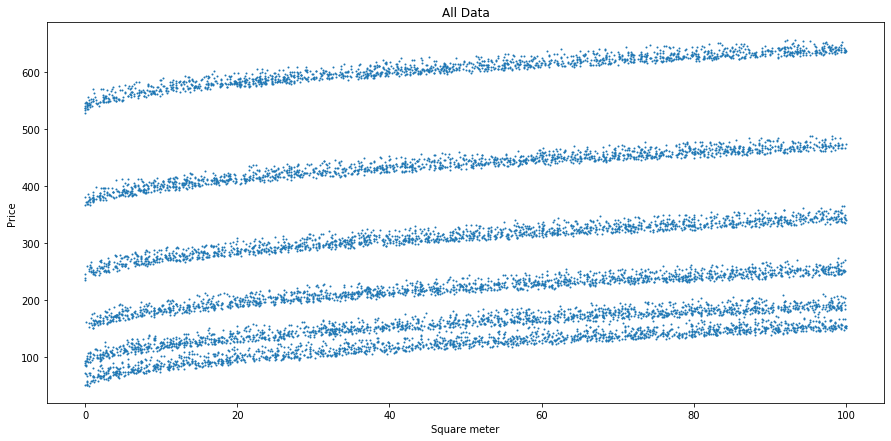

In [4]:
# visualize data set
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter([ X_training[i][0] for i in range(len(X_training)) ],y_training,s=1)

plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("All Data")

plt.show()

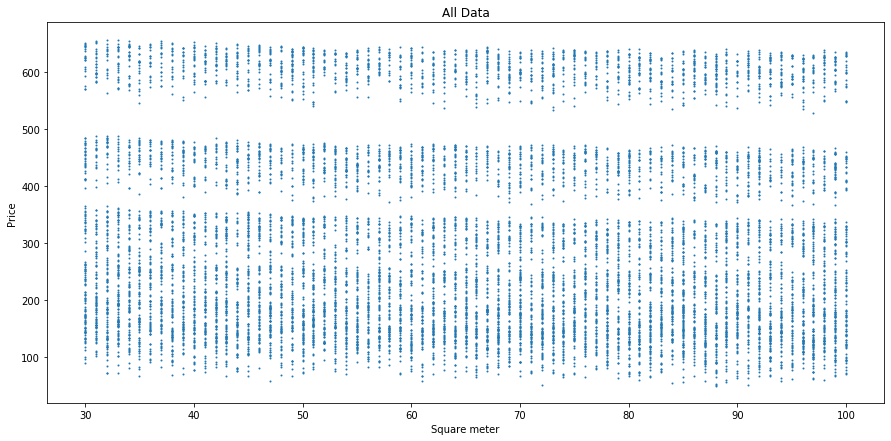

In [5]:
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter([ X_training[i][1] for i in range(len(X_training)) ],y_training,s=1)

plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("All Data")

plt.show()

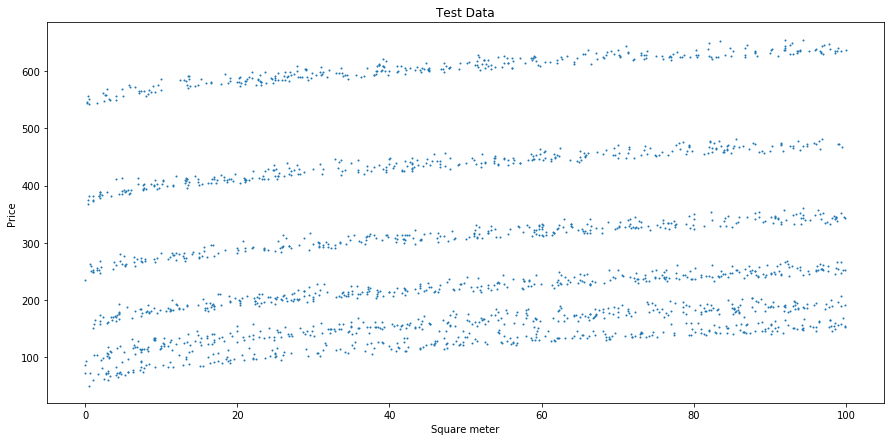

In [6]:
# visualize data set
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=1)

plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test Data")

plt.show()

In [7]:
class Tree:
    def __init__(self,X,feature_names,labels):
        
        self.X = X
        self.num_of_nodes = 0
        self.currentsplit = 0
        self.split_result = 0
        self.feature_names = feature_names #coloum names
        self.labels = labels#y
        self.catagories = set(labels)
        self.nodes = []
        self.split = 0
        self.leaf = 0
        self.steps = [0,0,0]
        

In [8]:
class Node:
    def __init__(self,labels,X,feature_ids):
        
        self.split_result = 0
        self.split = 0 #which column / which feature id
        self.feature_ids = feature_ids
        self.labels = labels
        self.X = X
        self.nodes = []
        self.regr = 0
        self.depth = 0
        self.top = 0
        self.bottom = 0
        self.steps = [0,0,0]
        
        self.leaf = 0 #true or false

In [9]:
def get_features(X,labels,column,bottom,top):#return splited data
    
    #on which dimension it should split the data -> column

    #Itt az adatokat mindig kettő felé osztjuk
    
    #number of dimensions
    #features = [ X[i][column] for i in range(bottom,top) ]#take a column
    #features = [ X[i][column] for i in range(len(X))  if X[i][column]<top and X[i][column]>=bottom]
    #print(features)
    
    ############################################################################
    sub_label = [labels[x] for x in range(len(labels)) if X[x][column]<top and X[x][column]>=bottom]
    sub_X = [X[x] for x in range(len(X)) if X[x][column]<top and X[x][column]>=bottom]
    #############################################################################
    #print(bottom)
    #print(top)
    
    #print(sub_X)
    #sub_label = [labels[x] for x in range(bottom,top)]
    #sub_X = [X[x] for x in range(bottom,top)]

        
    return [sub_X,sub_label]

In [10]:
def regression(regr_type,X,y,column,dgr):#whaT TYPE OF REGRESSION,data
    
    
    #reshape data
    
    X = [ [X[i][column]] for i in range(len(X)) ]
    #y = np.array(y).reshape((-1,1))
    #print(X)
    #print(y)
    
    regr = LinearRegression()
    regr.fit(X,y)
    
    
    return regr

In [11]:
def calculate_error(regr,X,y,column,regr_type,dgr):
    
    
    #reshape data
    X = [ [X[i][column]] for i in range(len(X)) ]
    if(regr_type == 1):
        X = PolynomialFeatures(degree=dgr).fit_transform(X)
    predict = regr.predict(X)

    difference = []
    
    for i in range(len(predict)):
        difference.append( (predict[i]-y[i])**2 )
    error = sum(difference)/len(difference)

  
    return error

In [12]:
def calculate_distance(i,j,column):
    
    #print("///////////////////////")
    #print(i)
 
    n1 = [ i[0][k][column] for k in range(len(i[0])) ]
    n2 = [ j[0][k][column] for k in range(len(j[0])) ]
    
    
    
    Ni = len(n1)
    Nj = len(n2)
    
    s1i = sum(n1)/Ni
    s1j = sum(n2)/Nj
    
    s2i = sum([x**2 for x in n1])/Ni
    s2j = sum([x**2 for x in n2])/Nj
    
    s3i = sum([x*y for x,y in zip(n1,i[1])])/Ni
    s3j = sum([x*y for x,y in zip(n2,j[1])])/Nj
    
    s4i = sum(i[1])/Ni
    s4j = sum(j[1])/Nj
    
    D = (s1i-s1j)**2 + (s2i-s2j)**2 + (s3i-s3j)**2 +(s4i-s4j)**2
    
    return D

In [13]:
def find_min_distance(sliced_data,column):
    
    dist = 0
    min_dist = -1
    index1 = -1
    index2 = -1
    #print(sliced_data[1])
    
    for i in range(len(sliced_data)-1):

            dist = calculate_distance(sliced_data[i],sliced_data[i+1],column)
            
            if(min_dist == -1):
                min_dist = dist
                index1 = i
                index2 = i+1
            if(dist<min_dist):
                min_dist = dist
                index1 = i
                index2 = i+1
    
    return index1,index2
    

In [14]:
def merge(sliced_data,regressions,column):
    
   
    #print(sliced_data)
    #print("////////////////////////////////////////////////////////////////////////////")
    index1,index2 = find_min_distance(sliced_data,column)
    
    #print(sliced_data)

    sliced_data[index1][0] = sliced_data[index1][0]+sliced_data[index2][0]
    sliced_data[index1][1] = sliced_data[index1][1]+sliced_data[index2][1]

    regressions[index1] = regression(0,sliced_data[index1][0],sliced_data[index1][1],column,0)
    #print("###############################################################################")
    sliced_data.pop(index2)
    regressions.pop(index2)
    
    return sliced_data,regressions

In [15]:
def find_best_split(X,labels,feature_ids,steps):
    
    step = -1
    #print(steps)
    features = 0 
    svalue = 0
    
    min_error = -1
    min_sliced_data = []
    min_regressions = []
    min_steps = -1
    min_column = -1

    for column in feature_ids:
            #print(column)
            
            X,labels = sort_f(X,labels,column)
            features = [ X[j][column] for j in range(len(X)) ] 
            
            sliced_data = []
            regressions = []
           
            
            dist = abs(features[0]-features[-1])
            
            
            step = int(dist/10)
            
            if(step < 2):
                step = 1
                #print(steps[column])
                #print(column)
                if(steps[column] > 3):
                    continue
            #print("//////////////////////////////////////////////////////")
            for k in range(int(features[0]),int(features[-1])+1,step): 
                #print(k)
                sliced_data.append(get_features(X,labels,column,k,k+step))
                
                if( len(sliced_data[-1][0]) == 0):
                    #print("zero")
                    #print(step)
                    
                    sliced_data.pop(-1)
                    continue
                regressions.append( regression( 0,sliced_data[-1][0],sliced_data[-1][1],column,0 ) )
                
            while(len(sliced_data)>3):
                #print("merge")
                sliced_data,regressions = merge(sliced_data,regressions,column)
                
            
            error = 0
            for i in range(len(sliced_data)):
                
                error += calculate_error(regressions[i],sliced_data[i][0],sliced_data[i][1],column,0,0)
            #sum the error after the split
            #choose min
            
            if(min_error == -1):
                min_sliced_data = sliced_data
                min_regressions = regressions
                min_steps = step
                min_column = column
                continue
                
            if(error<min_error):
                min_sliced_data = sliced_data
                min_regressions = regressions
                min_steps = step
                min_column = column
    
    #return split,split_value
    #print(len(min_sliced_data))
    if(min_steps < 2 and min_steps>=0):
            steps[min_column] += 1
    
    return min_sliced_data,min_regressions,min_column,steps


In [16]:
def build_tree(X,feature_ids,labels,leaf_size,var,depth,steps):
    
    #Két felé bontjuk az adatokat úgy hogy a legkisseb mse kapjuk

    boundaries = [] # last element of each bach
    
    
    
    split = 0 
    sub_nodes = []
    
    
    
    
    split_data,split_regression,column,steps = find_best_split(X,labels,feature_ids,steps)
    print(column)
    print(steps)
    print("///////////////////////////////////////////////////////////////////////////////////////////////////")
    for i,j in zip(split_data,split_regression):
        # len(i[0]) == 0 problem ???
        #print(i[0])
        #print(i[0])
        
        node = Node(i[1],i[0],feature_ids)#no need for feature_ids -> object inheritance   
        node.split = column   #column
        
        #split point
       
        node.split_result = i[0][-1][column]
        node.depth = depth
        node.regr = j
        
        node.top = i[0][-1][column]
        node.bottom = i[0][0][column]
        node.steps = steps
        print(node.steps)
        
        
        #Ha egy bizonyos error érték alá megyünk vagy elértünk egy bizonyos elemszámot akkor a node-ot leaf-nek nyilvánítjuk
        if(len(node.labels) <= leaf_size or calculate_error(node.regr,node.X,node.labels,split,0,3)<1):#############################
            node.leaf = 1
            print(node.X)
            #print(node.split)
            #print("leaf")
            
            
        else:
            node.leaf = 0
        sub_nodes.append(node)
    

    if(depth == 2000):
        for i in sub_nodes:
            i.leaf = 1
            print("leaf2")
        return sub_nodes
    
    depth +=1
    #############################
    ''''n = 0
    for i in steps:
        if(i > 4):
            n+=1
    
    if(n == len(steps)):
        return sub_nodes'''
    ############################
    
    leaf =  0
    for i in sub_nodes:
        print(i.steps)
        if(i.leaf == 1):
            leaf +=1
    #if we reach limit return nodes 
            
            
    if(leaf == len(sub_nodes)):
        '''print("leaf3")
        print(X)
        print("*******")
        print(split_data)
        print(steps)'''
        return sub_nodes
    
    else:
        for node in sub_nodes:

            if(node.leaf == 0):
                
                node.nodes = build_tree(node.X,node.feature_ids,node.labels,leaf_size,var,depth,steps)


    return sub_nodes   

In [17]:
def inicialize(X,feature_names,labels,leaf_size,var,depth):
    
    
    feature_ids = [x for x in range(len(feature_names))]
    tree = Tree(X,feature_names,labels)
    steps = []
    for i in feature_ids:
        steps.append(0)
    tree.nodes = build_tree(X,feature_ids,labels,leaf_size,var,depth,steps)
    return tree

In [18]:
#build_tree(training_data,header,labels)
forest = []
bottom = 1
top = 2

for i in range(bottom,top):
    print("-------------------------------------------------------")
    print("Iteration: %d"%(i))
    tree = inicialize(X_train,header,y_train,10,i,1)
    forest.append(tree)

-------------------------------------------------------
Iteration: 1
3
[0, 0, 0, 1]
///////////////////////////////////////////////////////////////////////////////////////////////////
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1]
3
[0, 0, 0, 2]
///////////////////////////////////////////////////////////////////////////////////////////////////
[0, 0, 0, 2]
[0, 0, 0, 2]
[0, 0, 0, 2]
[0, 0, 0, 2]
[0, 0, 0, 2]
[0, 0, 0, 2]
3
[0, 0, 0, 3]
///////////////////////////////////////////////////////////////////////////////////////////////////
[0, 0, 0, 3]
[0, 0, 0, 3]
[0, 0, 0, 3]
[0, 0, 0, 3]
3
[0, 0, 0, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[0, 0, 0, 4]
[0, 0, 0, 4]
2
[0, 0, 1, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[0, 0, 1, 4]
[0, 0, 1, 4]
[0, 0, 1, 4]
[0, 0, 1, 4]
[0, 0, 1, 4]
[0, 0, 1, 4]
2
[0, 0, 2, 4]
/////////////////////////////

1
[0, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[0, 4, 4, 4]
[0, 4, 4, 4]
[0, 4, 4, 4]
[0, 4, 4, 4]
[0, 4, 4, 4]
[0, 4, 4, 4]
0
[0, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[0, 4, 4, 4]
[0, 4, 4, 4]
[0, 4, 4, 4]
[0, 4, 4, 4]
[0, 4, 4, 4]
[0, 4, 4, 4]
0
[0, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[0, 4, 4, 4]
[[0.2, 35, 2, 3], [0.5, 33, 3, 3], [0.7, 38, 2, 3], [2.7, 41, 2, 3], [3.0, 40, 3, 3], [4.9, 30, 2, 3], [6.9, 38, 2, 3], [10.0, 41, 2, 3], [11.3, 35, 2, 3], [14.3, 31, 3, 3]]
[0, 4, 4, 4]
[[19.6, 30, 2, 3]]
[0, 4, 4, 4]
[[26.7, 32, 3, 3], [28.0, 33, 3, 3], [34.0, 31, 2, 3]]
[0, 4, 4, 4]
[0, 4, 4, 4]
[0, 4, 4, 4]
0
[0, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[0, 4, 4, 4]
[[37.8, 39, 3, 3], [39.8, 35, 2, 3], [42.0, 3

1
[2, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
1
[2, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
[[81.2, 50, 5, 3], [68.1, 50, 5, 3], [50.5, 50, 5, 3], [47.9, 50, 7, 3], [59.5, 50, 7, 3], [29.5, 50, 8, 3]]
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
0
[2, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
0
[2, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
[2, 4, 4, 4]
0
[3, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[3, 

0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[[91.2, 83, 8, 3], [92.3, 79, 8, 3], [92.8, 88, 6, 3], [97.7, 86, 6, 3], [98.5, 85, 6, 3], [99.1, 83, 6, 3], [99.8, 88, 7, 3]]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[[28.8, 81, 5, 3], [30.3, 85, 8, 3], [33.1, 85, 5, 3], [33.3, 86, 6, 3], [33.4, 86, 8, 3], [35.4, 84, 6, 3]]
[4, 4, 4, 4]
[[38.7, 88, 8, 3], [39.3, 83, 5, 3], [40.0, 81, 8, 3], [40.6, 81, 7, 3], [43.7, 82, 7, 3]]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[[0.2, 85, 8, 3], [0.2, 88, 6, 3], [2.4, 88, 7, 3], [3.7, 81, 6, 3], [5.0, 87, 8, 3], [5.9, 80, 5, 3], [6.8, 82, 8, 3], [7.2, 83, 5, 3], [9.6, 87, 5, 3]]
[4, 4

1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
////////////////////////////////////////////////////////////////////////////////////////////////

0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[[0.7, 69, 0, 4], [1.5, 69, 4, 4], [2.7, 69, 10, 4], [6.1, 70, 7, 4], [9.8, 70, 10, 4], [12.0, 71, 2, 4], [12.3, 71, 5, 4], [15.0, 71, 4, 4], [15.4, 69, 5, 4], [17.0, 69, 7, 4]]
[4, 4, 4, 4]
[[20.7, 70, 3, 4], [23.3, 69, 8, 4], [23.4, 70, 10, 4], [24.5, 70, 10, 4]]
[4, 4, 4, 4]
[[30.1, 71, 1, 4], [30.6, 70, 7, 4], [32.1, 70, 0, 4], [34.9, 70, 3, 4]]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[[37.0, 69, 10, 4], [43.2, 70, 3, 4], [46.0, 71, 2, 4], [48.6, 71, 6, 4]]
[4, 4, 4, 4]
[[53.2, 70, 4, 4], [59.4, 71, 8, 4], [60.1, 69, 0, 4], [61.0, 70, 0, 4], 

1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[[30.6, 49, 2, 5], [31.0, 45, 8, 5], [31.6, 48, 10, 5], [32.2, 49, 5, 5], [32.9, 48, 3, 5], [35.4, 47, 1, 5], [35.6, 46, 2, 5]]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
0
[4, 4, 4, 4]
//////////////////////////////////////////////

0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[[0.9, 100, 8, 5], [1.5, 96, 7, 5], [1.8, 100, 10, 5], [2.0, 98, 9, 5], [4.5, 98, 4, 5], [5.3, 98, 10, 5], [6.1, 98, 10, 5]]
[4, 4, 4, 4]


1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
0
[4, 4, 4, 4]
//////////////////////////////////////////////////////////

///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
0
[4, 4, 4, 4]
///////////////////////////////////

1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
0
[4, 4, 4, 4]
//////////////////////////////////////////////////////////

0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
-1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
1
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
///////////////////////////////////////////////////////////////////////////////////////////////////
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
[4, 4, 4, 4]
0
[4, 4, 4, 4]
//////////////////////////////////////////////////////////

In [19]:


#print(forest[0].nodes[0].labels)

In [20]:
def print_tree(node,num):
    for i in node.nodes:
        if(i.leaf != 1):
            print(len(i.labels))
            print_tree(i,num+1)
        else:
            print(i.labels)
   

In [21]:
def print_tree(node,num):
    for i in node.nodes:
        if(i.leaf != 1):
            print(i.steps)
            print_tree(i,num+1)
        else:
            print(i.steps)
            #print(i.labels)
   

In [22]:
#print_tree(forest[0],0)

In [23]:
def print_tree(node,num):
    for i in node.nodes:
        if(i.leaf != 1):
            #print(len(i.labels))
            for j in range(num):
                print(' ',end='')
            print(i.split,i.bottom,i.top,end = '   ')
            print(i.steps)
            if(i.split == -1):
                for j in range(num):
                    print(' ',end='')
                    print(i.labels)
            
            print_tree(i,num+1)
        else:
            for j in range(num):
                print(' ',end='')
            print(i.split,i.bottom,i.top)
            #for j in range(num):
            #    print(' ',end='')
            #print(i.labels)

In [24]:
#print_tree(forest[0],0)
#Egy fa leveleinek elemszáma
#Nem egyenlő az előre megadott határtól így tudjuk hogy az MSE szerint döntött így

In [25]:

def predict(node,value):
    #split_value
    #melyik érték alapján történt a split
    if(node.leaf == 1 ):#regression hasznalata
        #X = PolynomialFeatures(degree=3).fit_transform(np.array(value[node.split]).reshape((1,-1)) )
        p = node.regr.predict(np.array(value[node.split]).reshape((1,-1)))
        #print(node.split)
        #print(p)
        
        return p
    else:
        #for loop
        #print("###############################")
        c=0
        for i in node.nodes:
            #print(i.split_result)
            #print(i.top)
            #print(i.bottom)
            #print(value[i.split])
            #print(len(i.X))
            #print("/////////////")
            if (i.top>=value[i.split] and i.bottom<=value[i.split]):
                #print(i.split)
                c+=1
                p=predict(i,value)
                return p
        if(c == 0):
            p = node.regr.predict(np.array(value[node.split]).reshape((1,-1)))
            return p
            print("nope")
            print(node.split)
            print(p)


In [26]:
#Kiszámítjuk a teszt és a training data alapján az error mértékét
#Valamint a test adat alapján összehasonlítjuk az eredménnyel

diff = []
difference = []




for i in forest:
    d = []
    error = 0
    for j in range(len(X_test)): 
        #print(X_test[j])
        p = predict(i,X_test[j])
        #print(p)
        if(p == None):
            d.append(0)
            continue
        #A few extreme situations appear, so I do not take them into consideration, in order to get a clear view during visualization
        if(abs(y_test[j]-p[0])<1000 and p>0):
            error += abs(y_test[j]-p)
            d.append(p)
        else:
            d.append(0)
        
        #print(y_test[j],p)
        
    
    diff.append(d)
    difference.append(error)
    break
print(max(difference))
print(X_test[0])

[9123.88686656]
[23.3, 46, 9, 5]


2000
2000
616328.8410117413


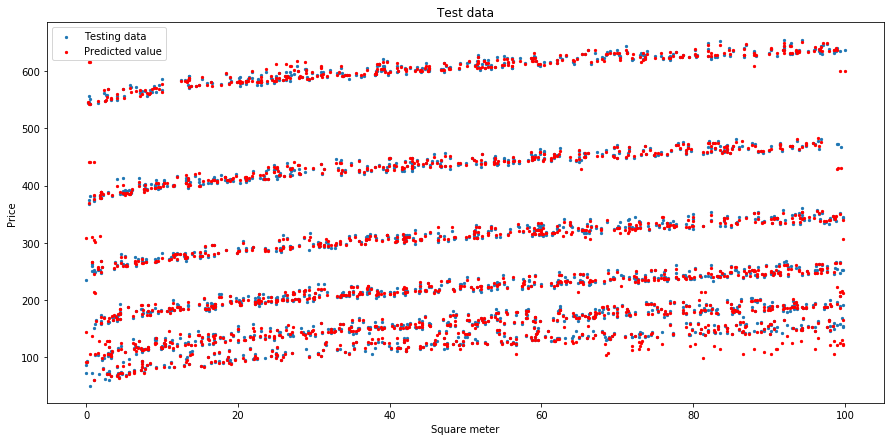

In [27]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(diff[0]))
print(len(y_test))
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],diff,c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test data")

plt.show()

2000
2000
616328.8410117413


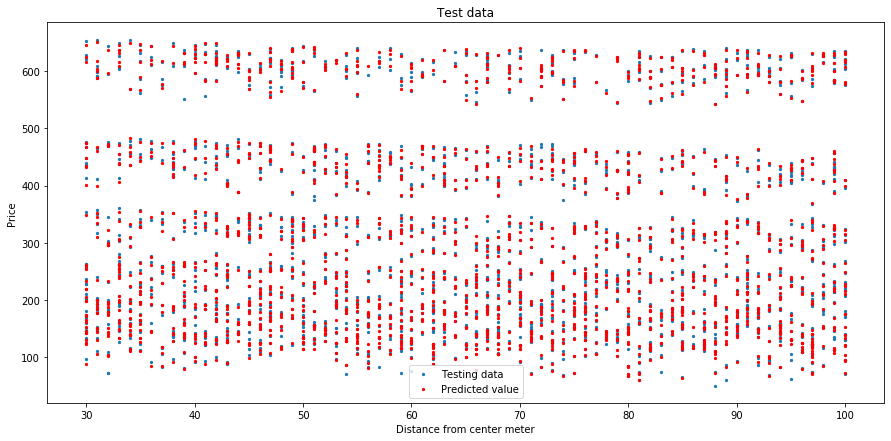

In [28]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(X_test))
print(len(y_test))
plt.scatter([ X_test[i][1] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][1] for i in range(len(X_test)) ],diff,c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Distance from center meter")
plt.ylabel("Price")
plt.title("Test data")

plt.show()

2000
2000
616328.8410117413


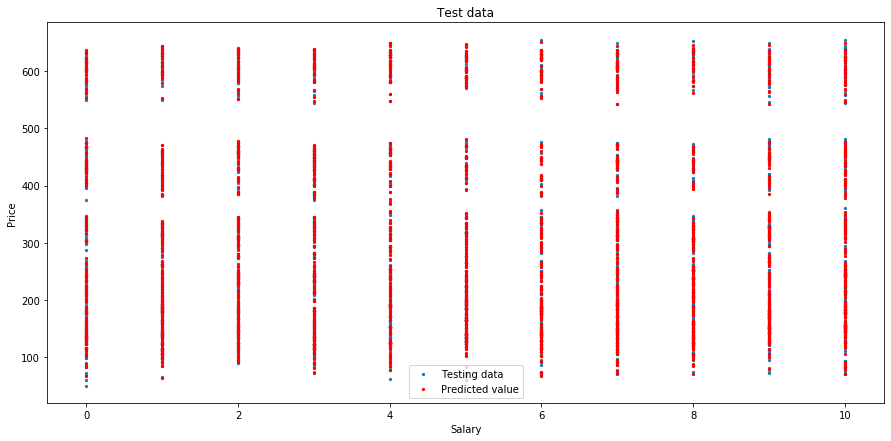

In [29]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(X_test))
print(len(y_test))
plt.scatter([ X_test[i][2] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][2] for i in range(len(X_test)) ],diff,c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Salary")
plt.ylabel("Price")
plt.title("Test data")

plt.show()

2000
2000
616328.8410117413


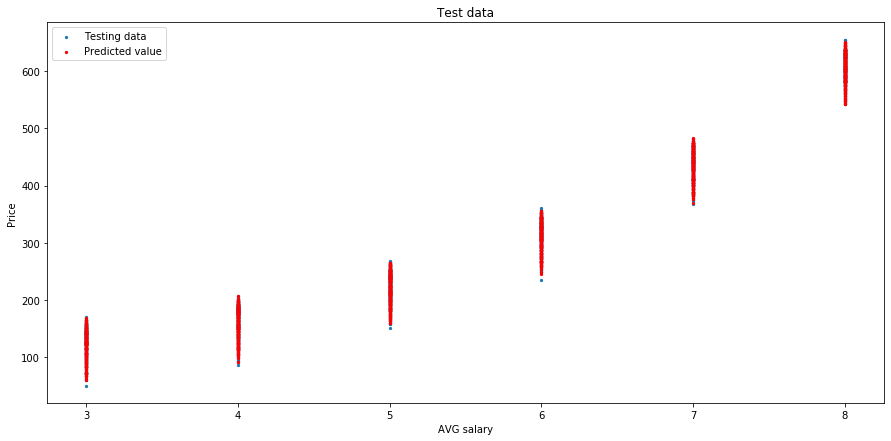

In [30]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(X_test))
print(len(y_test))
plt.scatter([ X_test[i][3] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][3] for i in range(len(X_test)) ],diff,c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("AVG salary")
plt.ylabel("Price")
plt.title("Test data")

plt.show()

In [31]:
a = [1,2,3]
b = [4,5,6]


print(a*b)

TypeError: can't multiply sequence by non-int of type 'list'

In [ ]:
a = [2,2,2]
b = [2,2,2]
print(len(a))
if (a!=b):
    print(a)